# Expanding and Rolling

It is a very common method to vreate rolling mean

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('walmart_stock.csv', index_col= 'Date', parse_dates = True)
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


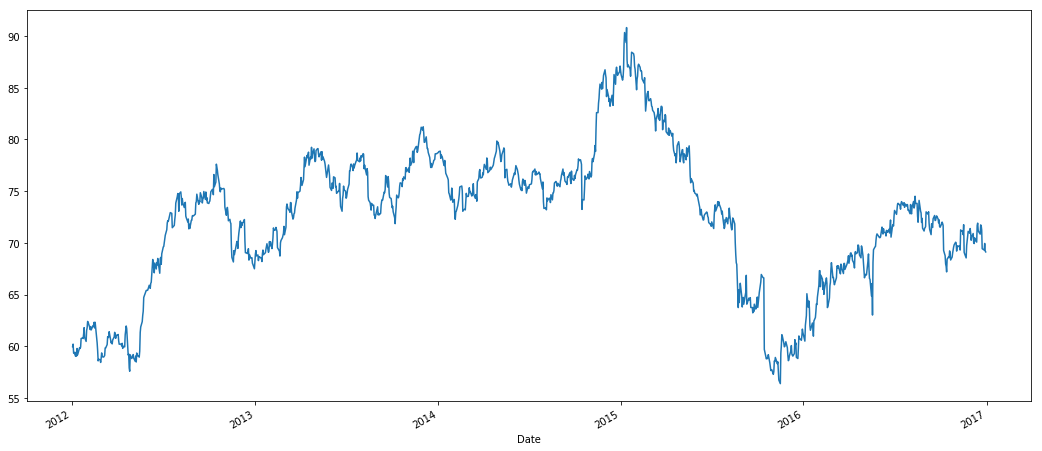

In [11]:
data['Open'].plot(figsize = (18,8))
plt.show()

## Rolling

Now calculating the rolling mean. The rolling mean requires a window size which is the basis for calculating the mean of the past n entries.

In [14]:
data.rolling(window = 10).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN


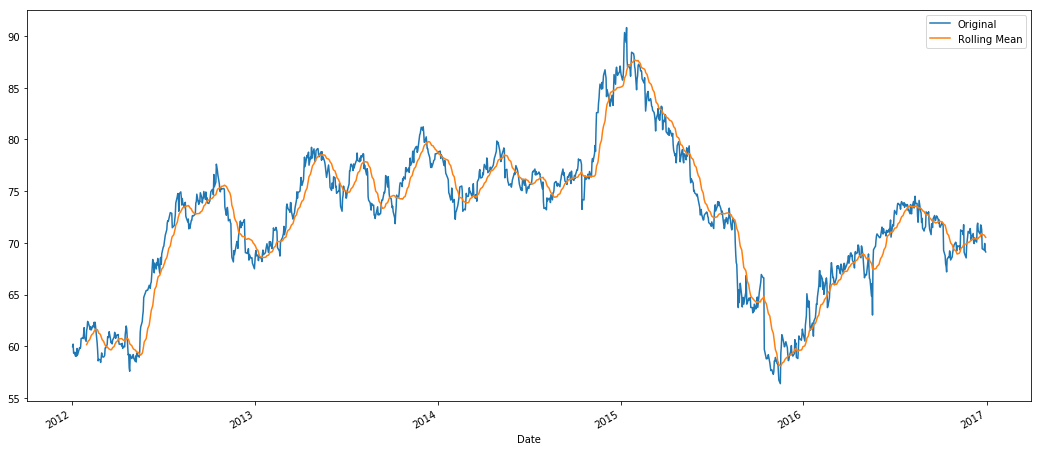

In [19]:
data['Open'].plot(label = 'Original')
data.rolling(window= 20).mean()['Open'].plot(figsize = (18,8), label = 'Rolling Mean')
plt.legend()
plt.show()

We can observe that the plot has been smoothened and much of the noise has been eliminated.

## Expanding

If we want to consider all the values from the beginning not just a limited size window then we can use the expanding parameter.

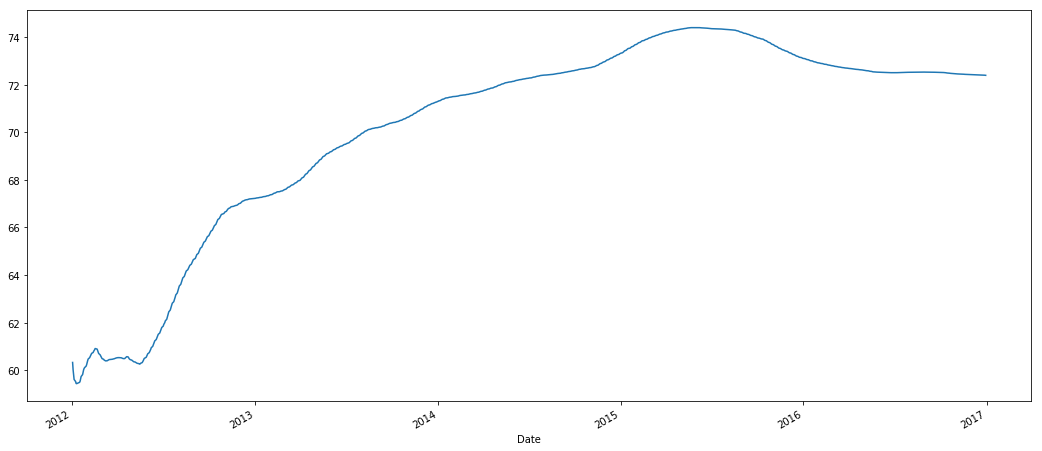

In [24]:
data['Close'].expanding().mean().plot(figsize = (18,8))
plt.show()

## Bollinger Bands

We will talk a lot more about financial analysis plots and technical indicators, but here is one worth mentioning!

More info : http://www.investopedia.com/terms/b/bollingerbands.asp

*Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and narrow when volatility decreases. This dynamic nature of Bollinger Bands also means they can be used on different securities with the standard settings. For signals, Bollinger Bands can be used to identify Tops and Bottoms or to determine the strength of the trend.*

*Bollinger Bands reflect direction with the 20-period SMA and volatility with the upper/lower bands. As such, they can be used to determine if prices are relatively high or low. According to Bollinger, the bands should contain 88-89% of price action, which makes a move outside the bands significant. Technically, prices are relatively high when above the upper band and relatively low when below the lower band. However, relatively high should not be regarded as bearish or as a sell signal. Likewise, relatively low should not be considered bullish or as a buy signal. Prices are high or low for a reason. As with other indicators, Bollinger Bands are not meant to be used as a stand alone tool. *

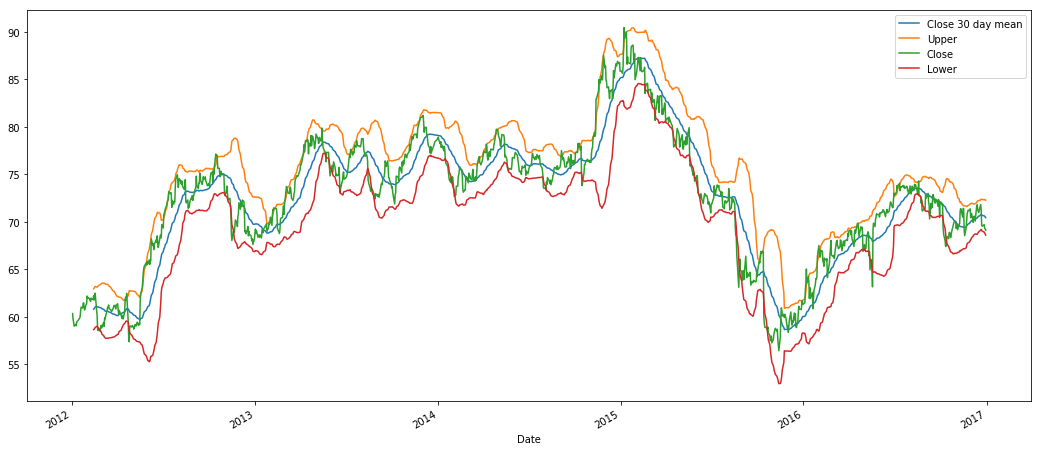

In [33]:
data['Close 30 day mean'] = data['Close'].rolling(window = 30).mean()
data['Upper'] = data['Close 30 day mean'] + 2*data['Close'].rolling(window = 30).std()
data['Lower'] = data['Close 30 day mean'] - 2*data['Close'].rolling(window = 30).std()
data[['Close 30 day mean','Upper','Close','Lower']].plot(figsize= (18,8))
plt.show()

For expanding operations, it doesn't help very much to visualize this against the daily data, but instead its a good way to get an idea of the "stability" of a stock. This idea of stability and volatility is something we are going to be exploring heavily in the next project, so let's jump straight into it!

If the variation of the daily values is more than the upper band or less than the lower band than it is a significant rise or fall in the stock market.

we can zoom in to the part of the graph as well.

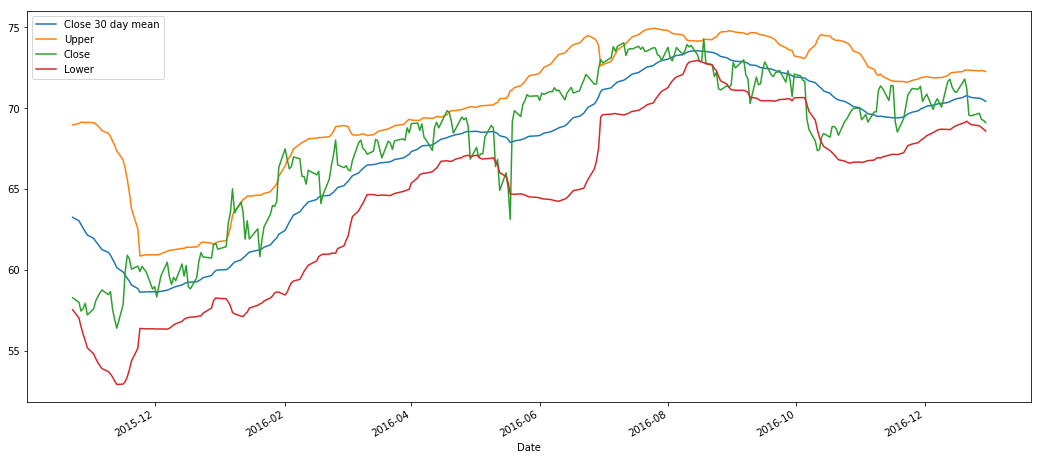

In [35]:
data[['Close 30 day mean','Upper','Close','Lower']].tail(300).plot(figsize= (18,8))
plt.show()

### de nada!